In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import cartopy as cart
import cartopy.crs as ccrs
import cmocean.cm as cmo
import seaborn as sns
from glob import glob
import os
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

%load_ext autoreload
%autoreload 2
#%load_ext version_information
%version_information numpy, matplotlib, cartopy, cmocean, seaborn, glob

In [6]:
shp_dict = {}
files = glob('../data/config/bathymetry/natural_earth/*.shp')
assert len(files) > 0
files.sort()
for f in files:
    depth = f.split('_')[-1].split('.')[0]
    # depth = '-' + f.split('_')[-1].split('.')[0]
    # depths.append(depth)
    nei = cart.io.shapereader.Reader(f)
    shp_dict[depth] = nei

In [7]:
depths = [d for d in shp_dict.keys()][::-1]
colors = sns.mpl_palette('cmo.ice_r',n_colors=8)
cmap   = sns.mpl_palette('cmo.ice',n_colors=8,as_cmap=True)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


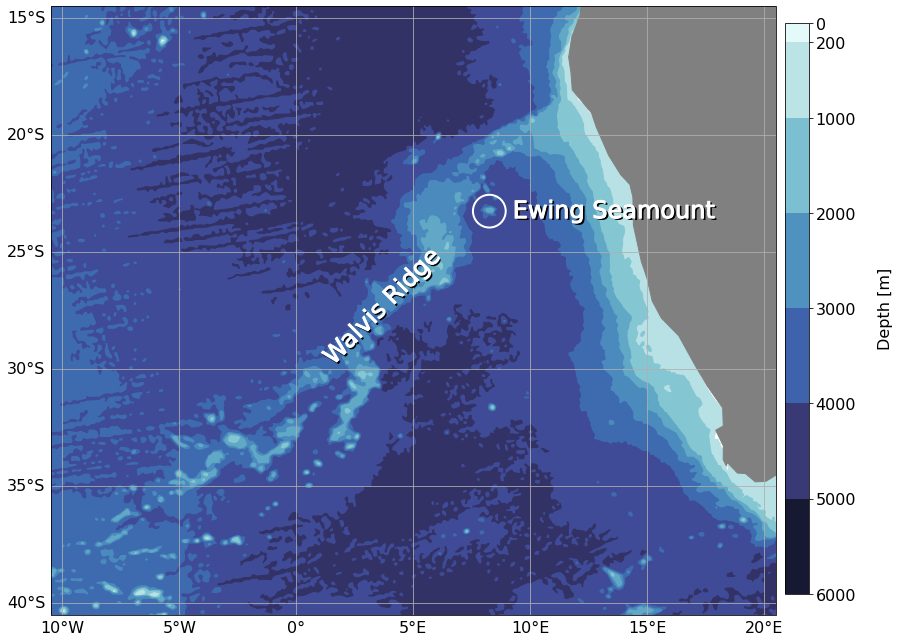

In [8]:
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'Arial'

fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-10.5, 20.5, -40.5, -14.5), crs=ccrs.PlateCarree())

i = 0
for depth in depths[:8]:
    ax.add_geometries(shp_dict[depth].geometries(),crs=ccrs.PlateCarree(),color=colors[i],zorder=0)
    i+=1
# ax.set_facecolor('grey')
# ax.add_feature(cart.feature.LAND,color='grey')
ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='land',scale='110m'),color='grey',
              zorder=1)
circle = mpatches.Circle((8.25, -23.25), radius=.7, fill=False, edgecolor='white', linewidth=2, zorder=2)
ax.add_patch(circle)
plt.text(9.35, -23.3, 'Ewing Seamount', color='black', ha='left', va='center', fontsize =24)
plt.text(9.25, -23.25, 'Ewing Seamount', color='white', ha='left', va='center', fontsize =24,path_effects=[withStroke(linewidth=1, foreground='white')])
plt.text(1.1, -30.05, 'Walvis Ridge', fontsize=24, color='black', ha='left', va='bottom', rotation='45')
plt.text(1, -30, 'Walvis Ridge', color='white', ha='left', va='bottom', rotation='45', fontsize =24,path_effects=[withStroke(linewidth=1, foreground='white')])

gl = ax.gridlines(draw_labels=True)
gl.xlocator = mticker.FixedLocator([-10,-5,0,5,10,15,20])
gl.ylocator = mticker.FixedLocator([-40,-35,-30,-25,-20,-15])
gl.right_labels = False
gl.top_labels = False

# Add custom colorbar
#axi = fig.add_axes([0.92,0.35,0.025,0.3])
axi = fig.add_axes([0.91,0.2,0.025,0.61])
norm = matplotlib.colors.Normalize(vmin=-6000,vmax=0)
cbar = matplotlib.colorbar.ColorbarBase(ax=axi,cmap=cmap,norm=norm,
        boundaries=(-np.array(depths[:8]).astype(int)).tolist()[::-1],
        ticks=-np.array(depths).astype(int),
        spacing='proportional',
        extend='neither',
        label='\nDepth [m]'
        )
def custom_formatter(x, pos):
    return str(int(np.abs(x)))
cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))
#plt.savefig('SE-Atlantic_map.png')

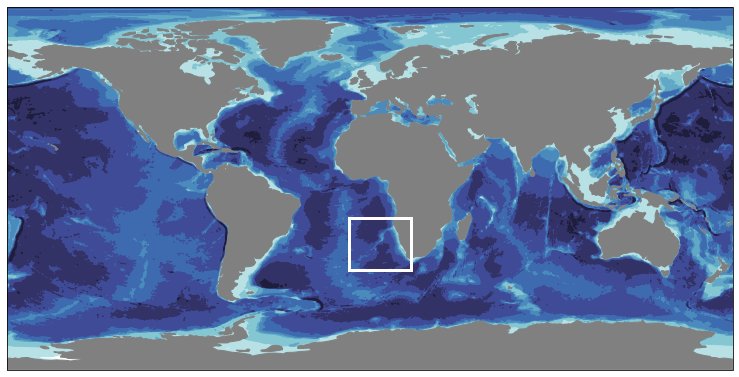

In [9]:
fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-180, 180, -90, 90), crs=ccrs.PlateCarree())

i = 0
for depth in depths[:8]:
    ax.add_geometries(shp_dict[depth].geometries(),crs=ccrs.PlateCarree(),color=colors[i],zorder=0)
    i+=1
ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='land',scale='110m'),color='grey',
              zorder=1)

rect = mpatches.Rectangle((-10.5, -40.5), 31, 26, fill=False, edgecolor='white', linewidth=3,zorder=2)
ax.add_patch(rect)
#plt.savefig('world_map.png');